In [1]:
!pip install tensorflow keras transformers torch nltk plotly cufflinks wordcloud keras-tuner chart-studio tf-keras accelerate

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5c/98/d145af334fd5807d6ba1ead447bf0c57a36654ea58e726d70c0d09cae913/tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/3f/0a/678ebcf4b6dad6ad63dfc2445d190f79a97fa7bc7150f57a6c505459e2bc/keras-3.9.2-py3-none-any.whl.metadata
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/a9/b6/5257d04ae327b44db31f15cce39e6020cc986333c715660b1315a9724d82/transformers-4.51.3-py3-none-any.whl.metadata
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/18/cf/ae99bd066571656185be0d88ee70abc58467b76f2f7c8bfeb48735a71fe6/torch-2.6.0-cp3


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install seaborn scikit-learn
# import required libraries
import tensorflow as tf
from tensorflow.keras.layers import LSTM
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from transformers import DistilBertForSequenceClassification
from keras.layers import Concatenate
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras import layers
from keras.callbacks import *
from keras.layers import *
from keras.models import Sequential,Model
import accelerate, torch
import kerastuner as kt
from transformers import TrainingArguments, Trainer

import transformers
from transformers import AutoTokenizer, TFAutoModel
from transformers import AutoConfig, AutoModel

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer,LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud,STOPWORDS
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
!pip install chart_studio
from IPython.display import HTML
import plotly
import cufflinks
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import iplot
from plotly.subplots import make_subplots

plotly.offline.init_notebook_mode(connected=True)
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from string import punctuation
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\Kanyin AKinwande\AppData\Local\Temp\ipykernel_11296\3225345733.py:24: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# load the three datasets
df_cleaned_1 = pd.read_csv('Preprocessed_Dataset_1.csv')
df_cleaned_2 = pd.read_csv('Preprocessed_Dataset_2.csv')
df_cleaned_3 = pd.read_csv('Preprocessed_Dataset_3.csv')

In [3]:
# Define a function for text preprocessing
def preprocess_data(df):
    # Initialize the Tokenizer to process the text data
    # num_words=10000: Only consider the top 10,000 words in the text corpus
    # oov_token="<OOV>": Specify the token for out-of-vocabulary words 
    tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
    
    # Fit the tokenizer on the 'Cleaned_text' column, which should contain preprocessed text
    tokenizer.fit_on_texts(df['Cleaned_text'])
    
    # Convert the texts into sequences of integers based on the tokenizer's word index
    sequences = tokenizer.texts_to_sequences(df['Cleaned_text'])
    
    # Pad the sequences to ensure they all have the same length
    # maxlen=100 truncates any sequences longer than 100 words and pads shorter ones to a length of 100
    X = pad_sequences(sequences, padding='post', maxlen=100)
    
    # Define the target variable 
    y = df['target']
    
    # Return the padded sequences (X), the target labels (y), and the tokenizer (so it can be used for future data)
    return X, y, tokenizer

# Preprocess data for each dataset
X1, y1, tokenizer_1 = preprocess_data(df_cleaned_1)  # Preprocess first dataset
X2, y2, tokenizer_2 = preprocess_data(df_cleaned_2)  # Preprocess second dataset
X3, y3, tokenizer_3 = preprocess_data(df_cleaned_3)  # Preprocess third dataset

# Split the data into training and testing sets (80% training, 20% testing)
# Dataset-1 splitting
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
# Dataset-2 splitting
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
# Dataset-2 splitting
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [15]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC, Precision, Recall




def create_cnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=64, input_length=100))

    # Add Conv1D with L2 regularization
    model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(GlobalMaxPooling1D())
    model.add(BatchNormalization())

    # Add Dense with L2 regularization
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    # This is the fix 
    model.add(Dense(1, activation='sigmoid'))  # For binary classification



    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), AUC()])
    

    return model


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot confusion matrix using seaborn heatmap
def plot_confusion_matrix(cm, labels):
    """Plot confusion matrix using seaborn heatmap"""
    # Set up the plot figure with specific size
    plt.figure(figsize=(6, 5))
    
    # Use seaborn to plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    
    # Add labels and title to the plot
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    
    # Show the plot
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc_score):
    """Plot the ROC curve"""
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot learning curves
def plot_learning_curves(history, model_name="Model"):
    """Plot training & validation loss and accuracy curves"""
    plt.figure(figsize=(12, 5))

    # Loss Curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', color='royalblue')
    plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
    plt.title(f'{model_name} - Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc', color='seagreen')
    plt.plot(history.history['val_accuracy'], label='Val Acc', color='firebrick')
    plt.title(f'{model_name} - Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# Function to train the model, evaluate performance, and visualize results
def train_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    """Train deep learning model, evaluate performance, and visualize results"""
    
    # Define early stopping to avoid overfitting.
    early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(
        # Model Parameters
        X_train, y_train,  
        epochs=20,  
        batch_size=32, 
        validation_data=(X_test, y_test),  # Validation data for evaluation during training
        callbacks=[early_stop],  # Early stopping to prevent overfitting
        verbose=1  # Show progress bar during training
    )
    
    # Generate predictions for the test set (threshold at 0.5 for binary classification)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    # Calculate accuracy score based on predictions
    acc = accuracy_score(y_test, y_pred)
    
    # Calculate weighted F1-score (useful for imbalanced classes)
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # Generate a classification report for a detailed performance summary
    class_report = classification_report(y_test, y_pred)
    
    # Compute confusion matrix to visualize the classification performance
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))  # Model predicts probabilities
    auc_score = auc(fpr, tpr)

    # Store relevant metrics in a dictionary
    metrics = {
        "Model": model_name,  # Store the model name
        "Accuracy": acc,  # Store the accuracy value
        "F1-score": f1,  # Store the F1-score
        "AUC": auc_score  # Store the AUC score
    }

    # Print the model performance results
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc_score:.4f}")
    print("\nClassification Report:\n", class_report)

    # Plot the confusion matrix to visualize the classification results
    plot_confusion_matrix(conf_matrix, labels=["Non-Disaster", "Disaster"])

    # Plot the ROC curve
    plot_roc_curve(fpr, tpr, auc_score)

    # Plot learning curves
    plot_learning_curves(history, model_name=model_name)
    
    # Return training history and computed metrics for further analysis or reporting
    return history, metrics

Epoch 1/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4876 - auc: 0.5154 - loss: 1.2817 - precision: 0.4383 - recall: 0.6930 - val_accuracy: 0.5314 - val_auc: 0.5415 - val_loss: 0.9378 - val_precision: 0.4456 - val_recall: 0.4568
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5128 - auc: 0.5291 - loss: 1.1404 - precision: 0.4429 - recall: 0.5606 - val_accuracy: 0.6234 - val_auc: 0.6171 - val_loss: 0.9230 - val_precision: 0.5971 - val_recall: 0.3281
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5540 - auc: 0.5725 - loss: 1.0422 - precision: 0.4883 - recall: 0.5477 - val_accuracy: 0.6393 - val_auc: 0.6691 - val_loss: 0.8993 - val_precision: 0.6075 - val_recall: 0.4082
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5563 - auc: 0.5754 - loss: 1.0215 - precision: 0.4830 - recall: 0.4976 - val_accuracy: 0.6585 - val_auc: 0.6887 - val_loss: 0.8808 - val_precision: 0.6494 - val_recall: 0.4129
Epoch 5/20
189/189 ━━━━━━━━━

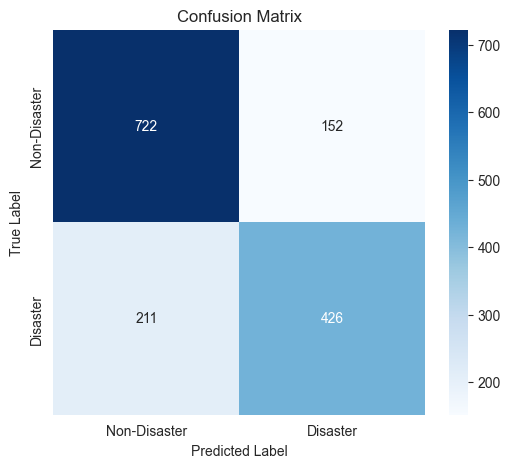

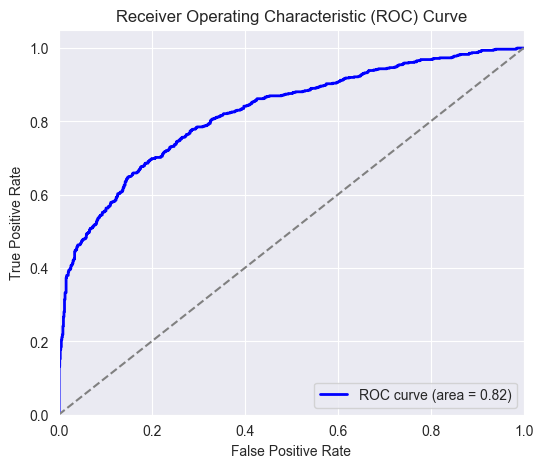

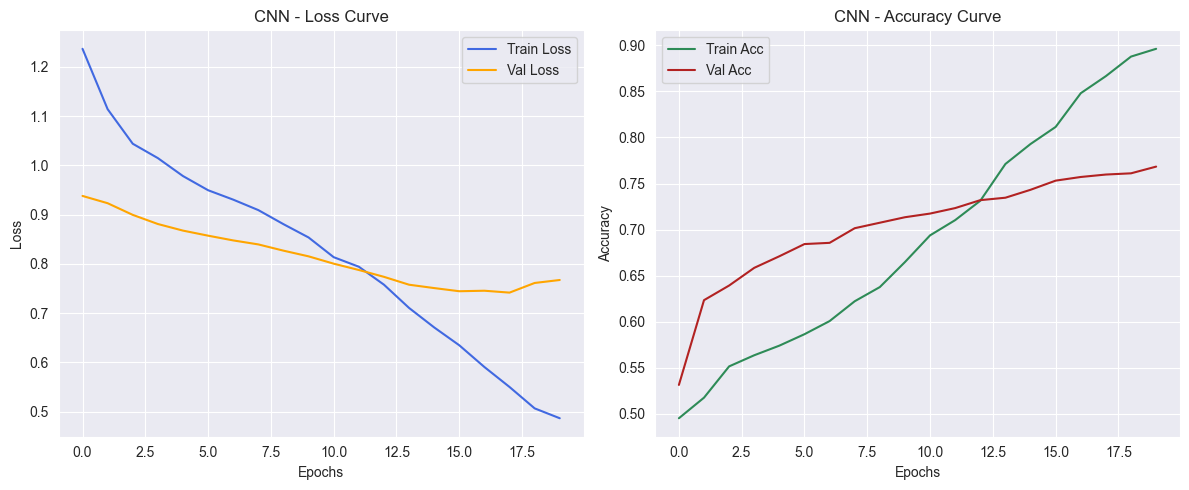

In [18]:
# Train CNN model for Dataset 1
# Create a CNN model using the previously defined 'create_cnn_model' function
cnn_model = create_cnn_model()

history_cnn, cnn_metrics = train_model(cnn_model, X_train_1, y_train_1, X_test_1, y_test_1, model_name="CNN")

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4607 - auc: 0.5144 - loss: 1.3899 - precision: 0.7033 - recall: 0.3985 - val_accuracy: 0.5762 - val_auc: 0.5744 - val_loss: 0.9450 - val_precision: 0.7519 - val_recall: 0.5952
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6358 - auc: 0.7041 - loss: 0.9156 - precision: 0.8360 - recall: 0.6043 - val_accuracy: 0.6140 - val_auc: 0.6198 - val_loss: 0.8890 - val_precision: 0.7651 - val_recall: 0.6528
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6934 - auc: 0.7772 - loss: 0.7893 - precision: 0.8584 - recall: 0.6839 - val_accuracy: 0.6503 - val_auc: 0.6440 - val_loss: 0.8701 - val_precision: 0.7860 - val_recall: 0.6925
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7508 - auc: 0.8291 - loss: 0.7086 - precision: 0.8622 - recall: 0.7640 - val_accuracy: 0.6727 - val_auc: 0.6595 - val_loss: 0.8471 - val_precision: 0.7812 - val_recall: 0.7440
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━

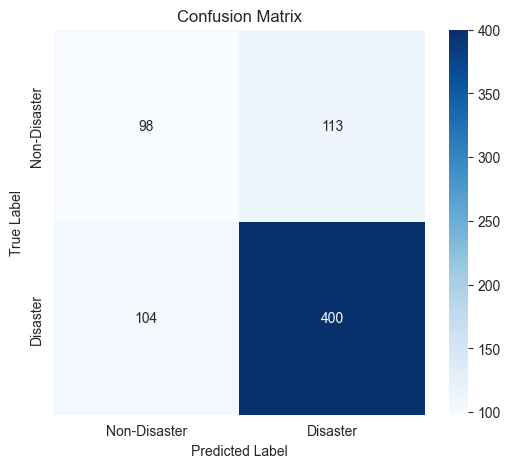

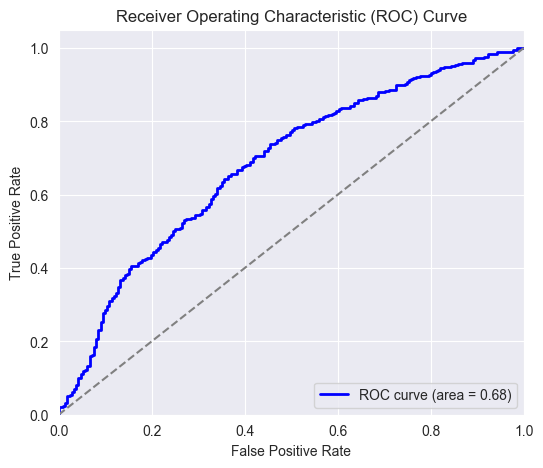

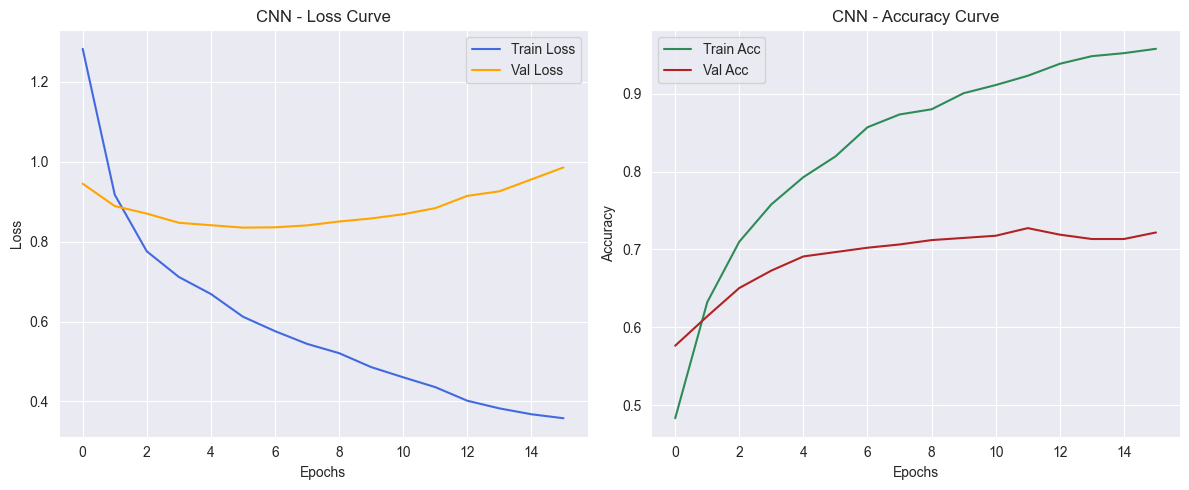

In [19]:
# Train the CNN model for Dataset 2
history_cnn, cnn_metrics = train_model(cnn_model, X_train_2, y_train_2, X_test_2, y_test_2, model_name="CNN")

Epoch 1/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4780 - auc: 0.5585 - loss: 1.2612 - precision: 0.2138 - recall: 0.6261 - val_accuracy: 0.7744 - val_auc: 0.7182 - val_loss: 0.7494 - val_precision: 0.3851 - val_recall: 0.4949
Epoch 2/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7691 - auc: 0.7445 - loss: 0.7270 - precision: 0.3986 - recall: 0.5059 - val_accuracy: 0.8294 - val_auc: 0.7646 - val_loss: 0.6536 - val_precision: 0.5127 - val_recall: 0.4066
Epoch 3/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8290 - auc: 0.7866 - loss: 0.6372 - precision: 0.5593 - recall: 0.4320 - val_accuracy: 0.8505 - val_auc: 0.7902 - val_loss: 0.5993 - val_precision: 0.6120 - val_recall: 0.3864
Epoch 4/20
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8593 - auc: 0.8550 - loss: 0.5640 - precision: 0.6661 - recall: 0.4468 - val_accuracy: 0.8492 - val_auc: 0.8175 - val_loss: 0.5829 - val_precision: 0.5810 - val_recall: 0.4798
Epoch 5/20
285/285 ━━━━━━━━━

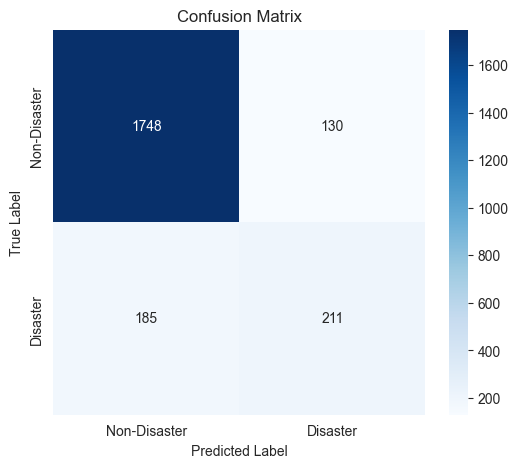

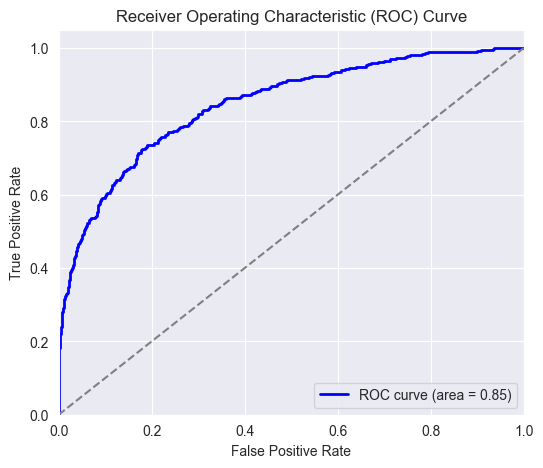

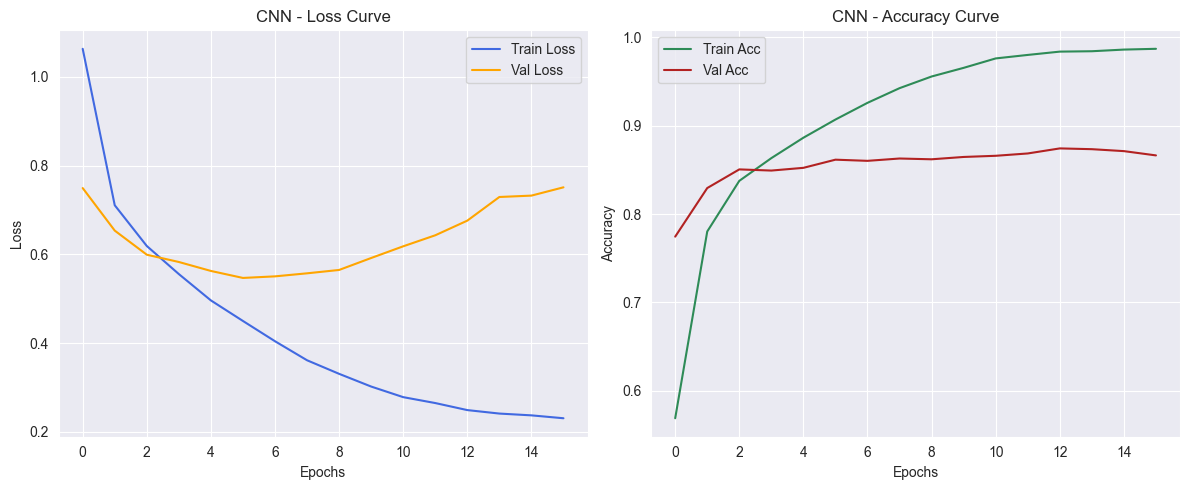

In [20]:
# Train the CNN model for Dataset 3
history_cnn, cnn_metrics = train_model(cnn_model, X_train_3, y_train_3, X_test_3, y_test_3, model_name="CNN")
